<a href="https://colab.research.google.com/github/GauravSardana00/Housing-Price-Prediction/blob/Completed-Project/Housing_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Housing Price prediction Machine learning model.**

Dataset:
https://drive.google.com/file/d/1NFtbuCF_0Y9NL1_jt_o3Qg--r4GvfCd0/view?usp=drive_link

##**Objective**

The Bengaluru Housing Price Prediction initiative seeks to analyze and forecast property values, aiming to grasp trends and identify influential features shaping housing prices in the region.

## **Summary**

In the realm of Housing Price Prediction, the primary objective is to forecast and understand the factors influencing property values. This project aims to analyze extensive housing data to unveil patterns and key features that play a pivotal role in determining property prices. By employing advanced predictive modeling techniques, the goal is to provide valuable insights for homeowners, real estate professionals, and investors. Anticipating trends in housing prices enables stakeholders to make informed decisions, whether it's buying, selling, or investing in real estate. The project ultimately seeks to contribute to a comprehensive understanding of the dynamics driving fluctuations in the housing market, empowering individuals to navigate and thrive in the ever-evolving real estate landscape.

## **Importing Necessary Libraries**

In [ ]:
#importing libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm
!pip install matplotlib scikit-learn
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore")







## **Importing Dataset**

In [ ]:
#connecting google drive to colab notebook.
from google.colab import drive

drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# storing data in variable df.
df = pd.read_csv('/content/drive/MyDrive/Ml/Bengaluru_House_Data.csv')

In [ ]:
#displaying first five rows of data
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


## **Data Understanding,Cleaning,Wrangling and Dimensionality Reduction**

In [ ]:
#Getting information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [ ]:
#dropping not useful columns...society is dropped beacuse there were too many null values.
df1 = df.drop(['society','availability'], axis = 'columns')
df1.head()

,area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [ ]:
#checking null values
null_values = df1.isnull().sum()

# Display null values for each column
print(null_values)

area_type       0
location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64


In [ ]:
# Handling null values in the 'location' column using mode
location_mode = df1['location'].mode()[0]
df1['location'] = df1['location'].fillna(location_mode)

# Handling null values in the 'bath' column using mode
bath_mode = df1['bath'].mode()[0]
df1['bath'] = df1['bath'].fillna(bath_mode)

# Handling null values in the 'balcony' column using mode
balcony_mode = df1['balcony'].mode()[0]
df1['balcony'] = df1['balcony'].fillna(balcony_mode)



In [ ]:
#Copy of data
df2=df1.copy()

In [ ]:
# Extract the numeric part from the 'size' column
df2['size'] = df2['size'].str.extract('(\d+)')


In [ ]:

# Rename the size column to 'bhk'
df2=df2.rename(columns={'size': 'bhk'})
df2.head()

,area_type,location,bhk,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2,1056,2.0,1.0,39.07
1,Plot Area,Chikka Tirupathi,4,2600,5.0,3.0,120.00
2,Built-up Area,Uttarahalli,3,1440,2.0,3.0,62.00
3,Super built-up Area,Lingadheeranahalli,3,1521,3.0,1.0,95.00
4,Super built-up Area,Kothanur,2,1200,2.0,1.0,51.00


In [ ]:
#Copy of data
df_k=df2.copy()

In [ ]:

# Handling missing values in the 'bhk' column using mode
size_mode = df_k['bhk'].mode()[0]
df_k['bhk'] = df_k['bhk'].fillna(size_mode)

# Display information about the updated DataFrame
df_k.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   area_type   13320 non-null  object 
 1   location    13320 non-null  object 
 2   bhk         13320 non-null  object 
 3   total_sqft  13320 non-null  object 
 4   bath        13320 non-null  float64
 5   balcony     13320 non-null  float64
 6   price       13320 non-null  float64
dtypes: float64(3), object(4)
memory usage: 728.6+ KB


In [ ]:
#handling values with'-' in total_sqft column

# Function to convert range to average value, keeping non-numeric values unchanged
def convert_range_to_avg(sqft):
    if '-' in sqft:
        # Extract lower and upper values from the range
        lower, upper = map(float, sqft.split('-'))
        # Calculate the average
        return (lower + upper) / 2
    elif sqft.replace('.', '', 1).isdigit():
        # Check if the value is numeric
        return float(sqft)
    else:
        # Return non-numeric values unchanged
        return sqft

# Apply the function to the 'total_sqft' column
df_k['total_sqft'] = df_k['total_sqft'].apply(convert_range_to_avg)

# Display the modified DataFrame
print(df_k)

                  area_type                  location bhk total_sqft  bath  \
0      Super built-up  Area  Electronic City Phase II   2     1056.0   2.0   
1                Plot  Area          Chikka Tirupathi   4     2600.0   5.0   
2            Built-up  Area               Uttarahalli   3     1440.0   2.0   
3      Super built-up  Area        Lingadheeranahalli   3     1521.0   3.0   
4      Super built-up  Area                  Kothanur   2     1200.0   2.0   
...                     ...                       ...  ..        ...   ...   
13315        Built-up  Area                Whitefield   5     3453.0   4.0   
13316  Super built-up  Area             Richards Town   4     3600.0   5.0   
13317        Built-up  Area     Raja Rajeshwari Nagar   2     1141.0   2.0   
13318  Super built-up  Area           Padmanabhanagar   4     4689.0   4.0   
13319  Super built-up  Area              Doddathoguru   1      550.0   1.0   

       balcony   price  
0          1.0   39.07  
1          3.

In [ ]:

# List of column names to convert to integer
columns_to_convert = ['bhk', 'balcony','bath']

# Convert selected columns to integer
df_k[columns_to_convert] = df_k[columns_to_convert].astype(int)

# Display the modified DataFrame
print(df_k.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   area_type   13320 non-null  object 
 1   location    13320 non-null  object 
 2   bhk         13320 non-null  int64  
 3   total_sqft  13320 non-null  object 
 4   bath        13320 non-null  int64  
 5   balcony     13320 non-null  int64  
 6   price       13320 non-null  float64
dtypes: float64(1), int64(3), object(3)
memory usage: 728.6+ KB
None


In [ ]:

# Convert a particular column (e.g., 'string_column') to float, drop non-convertible values
df_k['total_sqft'] = pd.to_numeric(df_k['total_sqft'], errors='coerce')


# Display the DataFrame after the conversion and dropping NaN values
print(df_k.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   area_type   13320 non-null  object 
 1   location    13320 non-null  object 
 2   bhk         13320 non-null  int64  
 3   total_sqft  13274 non-null  float64
 4   bath        13320 non-null  int64  
 5   balcony     13320 non-null  int64  
 6   price       13320 non-null  float64
dtypes: float64(2), int64(3), object(2)
memory usage: 728.6+ KB
None


In [ ]:
#Getting a new coloumn ('price per square fit')
df3 = df_k.copy()
df3['price_per_sqft'] = df3['price'] * 100000 / df3['total_sqft']
df3.head()



,area_type,location,bhk,total_sqft,bath,balcony,price,price_per_sqft
0,Super built-up Area,Electronic City Phase II,2,1056.0,2,1,39.07,3699.810606
1,Plot Area,Chikka Tirupathi,4,2600.0,5,3,120.00,4615.384615
2,Built-up Area,Uttarahalli,3,1440.0,2,3,62.00,4305.555556
3,Super built-up Area,Lingadheeranahalli,3,1521.0,3,1,95.00,6245.890861
4,Super built-up Area,Kothanur,2,1200.0,2,1,51.00,4250.000000


In [ ]:
#Grouping data with respect to location
df3.location = df3.location.apply(lambda x : x.strip())

location_stats = df3.groupby('location')['location'].agg('count').sort_values(ascending = False)
location_stats



location
Whitefield               542
Sarjapur  Road           399
Electronic City          304
Kanakpura Road           273
Thanisandra              237
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1294, dtype: int64

Any location which is having less than or equal to 10 data points will be tagged as other.

In [ ]:
#Getting the number of loations with less than equal to 10 examples
len(location_stats[location_stats<=10])

1053

In [ ]:
#Displaying the locations with less examples
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10



location
Sadashiva Nagar          10
Nagappa Reddy Layout     10
Nagadevanahalli          10
Dodsworth Layout         10
1st Block Koramangala    10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1053, dtype: int64

In [ ]:
#Getting the number of unique location
len(df3.location.unique())

1294

In [ ]:
# converting not frequently location to other
df3.location = df3.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df3.location.unique())



242

In [ ]:
#displaying the data
df3.head(10)

,area_type,location,bhk,total_sqft,bath,balcony,price,price_per_sqft
0,Super built-up Area,Electronic City Phase II,2,1056.0,2,1,39.07,3699.810606
1,Plot Area,Chikka Tirupathi,4,2600.0,5,3,120.00,4615.384615
2,Built-up Area,Uttarahalli,3,1440.0,2,3,62.00,4305.555556
3,Super built-up Area,Lingadheeranahalli,3,1521.0,3,1,95.00,6245.890861
4,Super built-up Area,Kothanur,2,1200.0,2,1,51.00,4250.000000
5,Super built-up Area,Whitefield,2,1170.0,2,1,38.00,3247.863248
6,Super built-up Area,Old Airport Road,4,2732.0,4,2,204.00,7467.057101
7,Super built-up Area,Rajaji Nagar,4,3300.0,4,2,600.00,18181.818182
8,Super built-up Area,Marathahalli,3,1310.0,3,1,63.25,4828.244275
9,Plot Area,other,6,1020.0,6,2,370.00,36274.509804


In [ ]:
# Rename the "size" column to "bhk"
df3 = df3.rename(columns={'size': 'bhk'})

# Display the DataFrame after renaming the column
print(df3)

                  area_type                  location  bhk  total_sqft  bath  \
0      Super built-up  Area  Electronic City Phase II    2      1056.0     2   
1                Plot  Area          Chikka Tirupathi    4      2600.0     5   
2            Built-up  Area               Uttarahalli    3      1440.0     2   
3      Super built-up  Area        Lingadheeranahalli    3      1521.0     3   
4      Super built-up  Area                  Kothanur    2      1200.0     2   
...                     ...                       ...  ...         ...   ...   
13315        Built-up  Area                Whitefield    5      3453.0     4   
13316  Super built-up  Area                     other    4      3600.0     5   
13317        Built-up  Area     Raja Rajeshwari Nagar    2      1141.0     2   
13318  Super built-up  Area           Padmanabhanagar    4      4689.0     4   
13319  Super built-up  Area              Doddathoguru    1       550.0     1   

       balcony   price  price_per_sqft 

All the above steps were to handle the inconsistencies in data.

## **EDA:Data Visualizations and charts**

In [ ]:
# Setting the chart size
plt.figure(figsize=(8, 6))

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

#### **Count Plot for area_type column.**

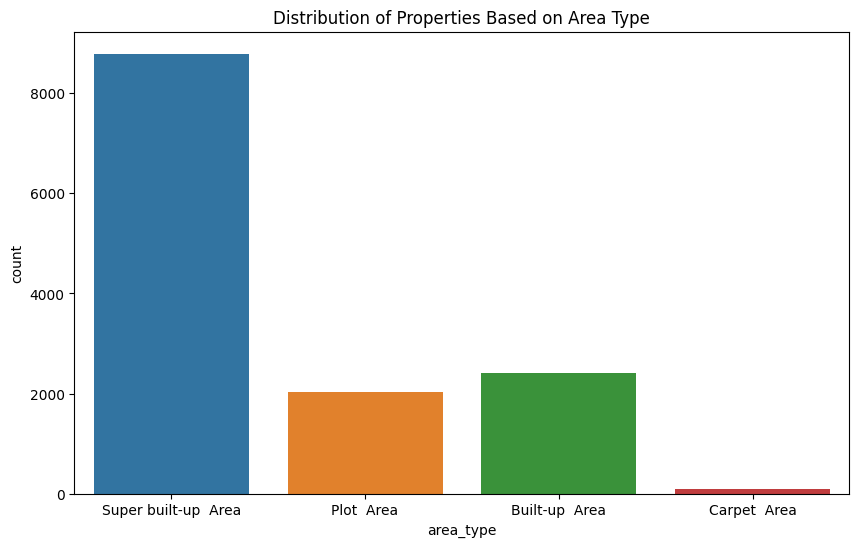

In [ ]:
#  Count plot for Area Type
plt.figure(figsize=(10, 6))
sns.countplot(x='area_type', data=df3)
plt.title('Distribution of Properties Based on Area Type')
plt.show()

Insights which I got from the above chart are:
1. The most number of properties in data are having super built-up area .Count of the properties is somehwere around 8500.

2. Least number of properties in data with respect to area type are carpet area.

#### **Histogram plot of total_sqft column.**

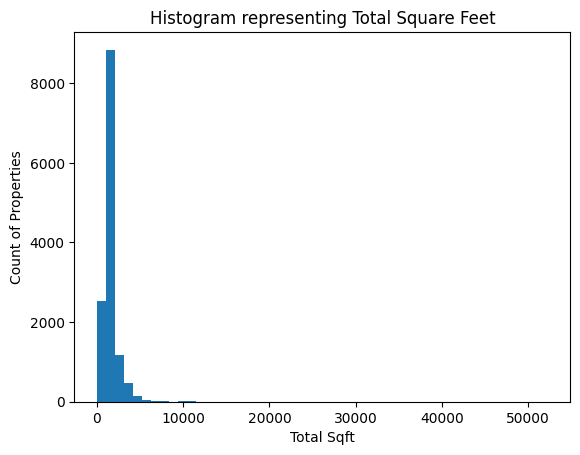

In [ ]:
#Histogram plot
plt.hist(df3["total_sqft"], bins=50)
plt.title('Histogram representing Total Square Feet')
plt.xlabel('Total Sqft')
plt.ylabel('Count of Properties')
plt.show()



Insights which I got from the above chart is that:

Most of the properties are having areas which is less than 5000 sqft hence areas more than 5000 sqft can be treated as outliers.

#### **Scatter plot between total_sqft and price column.**

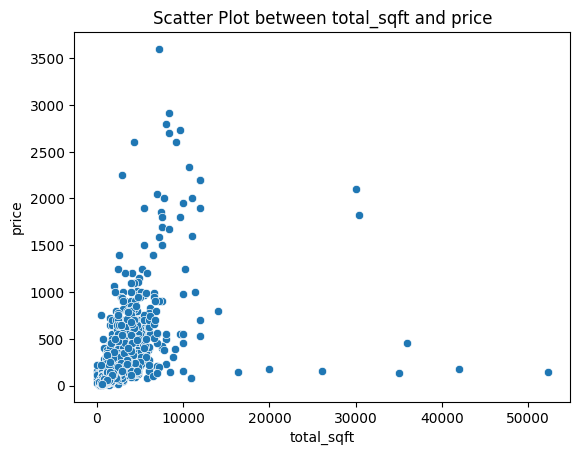

In [ ]:
#Scatter plot
sns.scatterplot(x="total_sqft", y="price", data=df3)
plt.title('Scatter Plot between total_sqft and price')
plt.show()



Insights which I got from above charts:

As the total_sqft of the property is increasing,price is also increasing with respect to to total_sqft.


#### **Correlation Heat Map.**

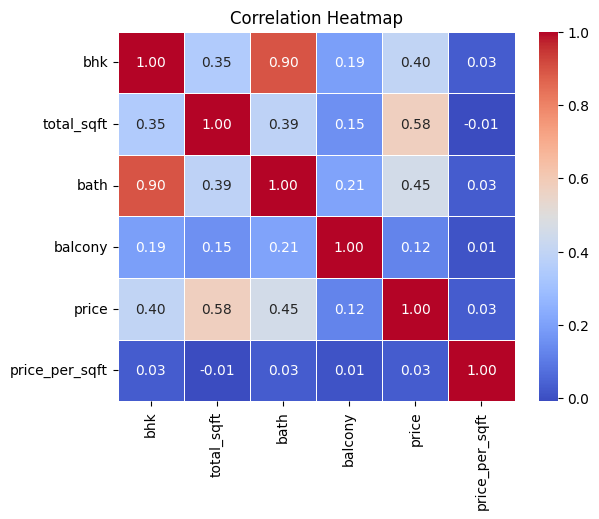

In [ ]:
#Heat map
correlation_matrix = df3.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

Insights from the above chart:

1. There is strong positive correlation between bath column and bhk column.
2. There is moderate correlation between price and total_sqft column.
3. There is weak correlation between price and balcony column.


#### **Column Chart**

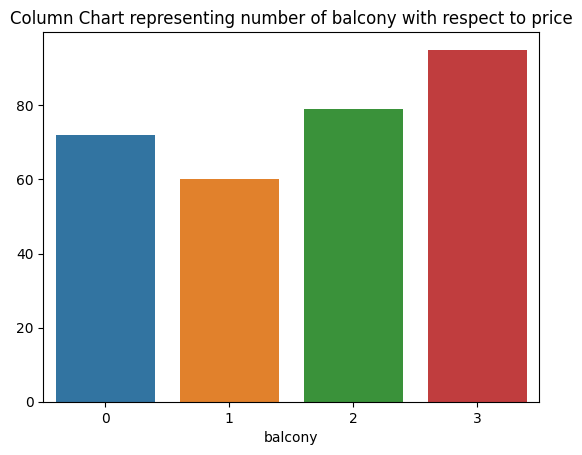

In [ ]:
#Column chart
temp = df3.groupby("balcony")["price"].median()
sns.barplot(x=temp.index, y=temp.values)
plt.title('Column Chart representing number of balcony with respect to price')
plt.show()



Insights which I got from above chart are:

1. The average price for properties without balconies or with more than one balcony is higher compared to properties with only one balcony.

2. This suggests that properties featuring a single balcony may be perceived as less desirable, leading to lower prices, while those without balconies or with multiple balconies command higher prices in the market.

#### **Pairplot.**

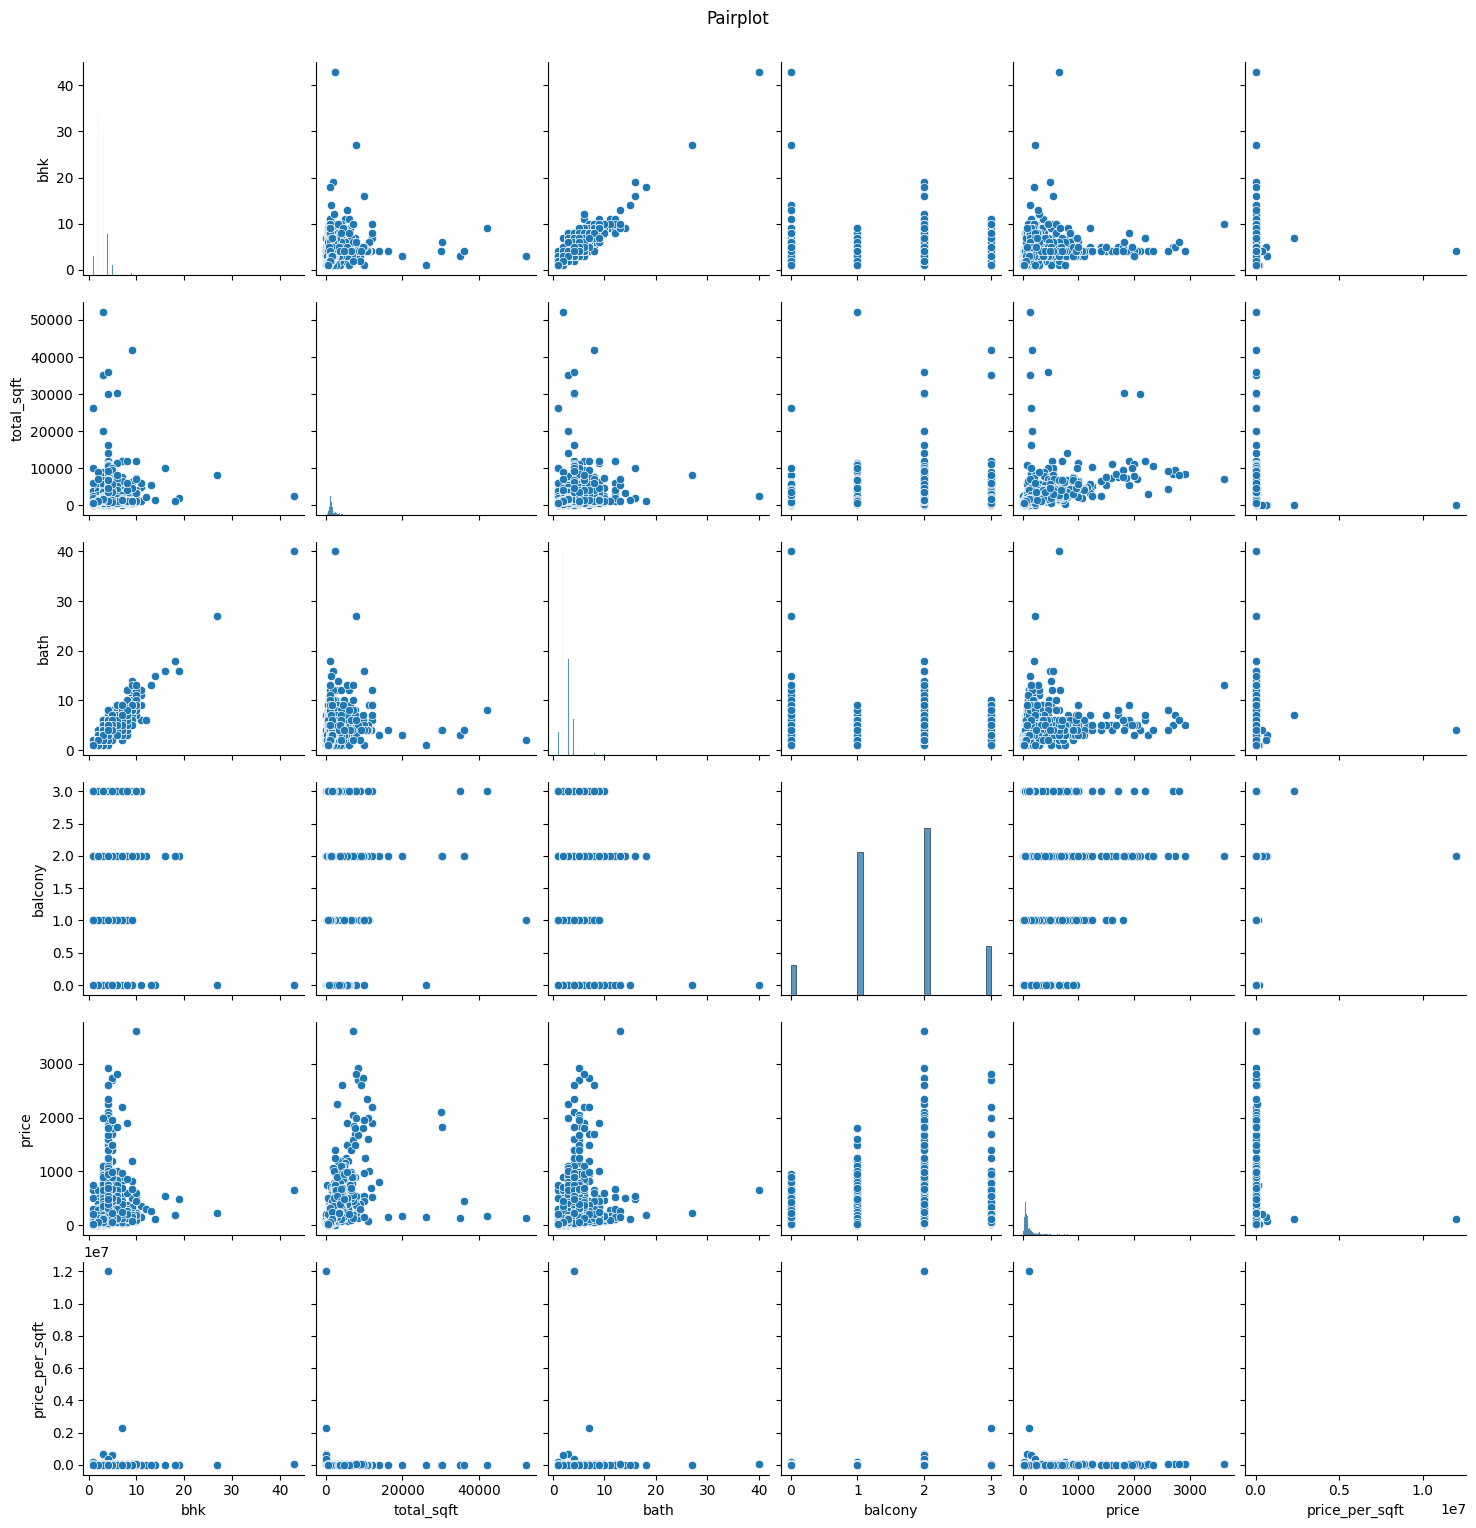

In [ ]:
# Create a pairplot using Seaborn
sns.pairplot(df3)
plt.suptitle('Pairplot', y=1.02)
plt.show()

##**Data Preprocessing**




### **Outlier identification and removal**

   It was highlighted that, typically, there is an established standard of 300 square feet per bedroom in the real estate industry. For instance, a 2 BHK (two-bedroom hall kitchen) apartment is expected to have a minimum area of 600 square feet. The manager emphasized that instances where, for example, a 2 BHK apartment has only 400 square feet appear suspicious and may be considered as outliers. To address this, the proposed approach involves setting a minimum threshold of 300 square feet per bedroom, allowing for the identification and removal of such outliers from the dataset.

In [ ]:
#Detecting Data points other than minimum threshold of 300 sqft/bedroom
df3[df3.total_sqft/df3.bhk<300].head()

,area_type,location,bhk,total_sqft,bath,balcony,price,price_per_sqft
9,Plot Area,other,6,1020.0,6,2,370.0,36274.509804
45,Plot Area,HSR Layout,8,600.0,9,2,200.0,33333.333333
58,Plot Area,Murugeshpalya,6,1407.0,4,1,150.0,10660.980810
68,Plot Area,Devarachikkanahalli,8,1350.0,7,0,85.0,6296.296296
70,Plot Area,other,3,500.0,3,2,100.0,20000.000000


In [ ]:
#Removing the outliers
df4 = df3[~(df3.total_sqft/df3.bhk<300)]
df4.shape



(12576, 8)

**Outlier removal using standard deviation and mean.**

In [ ]:
df4.price_per_sqft.describe()

count     12530.000000
mean       6303.979357
std        4162.237981
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

Here we find that min price per sqft is 267 rs/sqft whereas max is 12000000, this shows a wide variation in property prices. We should remove outliers per location using mean and one standard deviation

In [ ]:
#Outlier removal using mean and standard deviation in price/sqft column
def remove_pps_outliers(df_outlier):
    df_out = pd.DataFrame()
    for key, subdf in df_outlier.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df5 = remove_pps_outliers(df4)
df5.shape

(10301, 8)

In [ ]:
#Dropping price/sqft column
df5 = df5.drop('price_per_sqft', axis=1)
df5.head()

,area_type,location,bhk,total_sqft,bath,balcony,price
0,Super built-up Area,1st Block Jayanagar,4,2850.0,4,1,428.0
1,Super built-up Area,1st Block Jayanagar,3,1630.0,3,2,194.0
2,Super built-up Area,1st Block Jayanagar,3,1875.0,2,3,235.0
3,Built-up Area,1st Block Jayanagar,3,1200.0,2,0,130.0
4,Super built-up Area,1st Block Jayanagar,2,1235.0,2,2,148.0


### **One Hot Encoding**

 **One Hot Encoding for location**

In [ ]:
#Creating dummies of location column
dummies = pd.get_dummies(df5.location)
dummies.head(3)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#Concatenating dummies to the dataset(df5)
df6 = pd.concat([df5, dummies], axis='columns')
df6.head()



,area_type,location,bhk,total_sqft,bath,balcony,price,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,Super built-up Area,1st Block Jayanagar,4,2850.0,4,1,428.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Super built-up Area,1st Block Jayanagar,3,1630.0,3,2,194.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Super built-up Area,1st Block Jayanagar,3,1875.0,2,3,235.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Built-up Area,1st Block Jayanagar,3,1200.0,2,0,130.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Super built-up Area,1st Block Jayanagar,2,1235.0,2,2,148.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Now dropping location column as it has been one hot encoded
df7 = df6.drop('location',axis='columns')
df7.head()



,area_type,bhk,total_sqft,bath,balcony,price,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,Super built-up Area,4,2850.0,4,1,428.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Super built-up Area,3,1630.0,3,2,194.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Super built-up Area,3,1875.0,2,3,235.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Built-up Area,3,1200.0,2,0,130.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Super built-up Area,2,1235.0,2,2,148.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**One Hot Encoding for area_type column**

In [ ]:
# Now creating dummies for area_type column
dummies2 = pd.get_dummies(df7.area_type)
dummies2.head(3)

,Built-up Area,Carpet Area,Plot Area,Super built-up Area
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1


In [ ]:
# Concatenating dummies of area_type to dataset(df7)
df8 = pd.concat([df7,dummies2],axis='columns')
df8.head()

,area_type,bhk,total_sqft,bath,balcony,price,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other,Built-up Area,Carpet Area,Plot Area,Super built-up Area
0,Super built-up Area,4,2850.0,4,1,428.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,Super built-up Area,3,1630.0,3,2,194.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,Super built-up Area,3,1875.0,2,3,235.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,Built-up Area,3,1200.0,2,0,130.0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,Super built-up Area,2,1235.0,2,2,148.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
# Dropping area_type column as dummies has been created
df9 = df8.drop('area_type',axis='columns')
df9.head()

,bhk,total_sqft,bath,balcony,price,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other,Built-up Area,Carpet Area,Plot Area,Super built-up Area
0,4,2850.0,4,1,428.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,3,1630.0,3,2,194.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,3,1875.0,2,3,235.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,3,1200.0,2,0,130.0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,2,1235.0,2,2,148.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
# Checking count of rows and columns of dataset.
df9.shape

(10301, 251)

In [ ]:
# Printing column names list
column_names_list = list(df9.columns)
print(column_names_list)


['bhk', 'total_sqft', 'bath', 'balcony', 'price', '1st Block Jayanagar', '1st Phase JP Nagar', '2nd Phase Judicial Layout', '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar', '6th Phase JP Nagar', '7th Phase JP Nagar', '8th Phase JP Nagar', '9th Phase JP Nagar', 'AECS Layout', 'Abbigere', 'Akshaya Nagar', 'Ambalipura', 'Ambedkar Nagar', 'Amruthahalli', 'Anandapura', 'Ananth Nagar', 'Anekal', 'Anjanapura', 'Ardendale', 'Arekere', 'Attibele', 'BEML Layout', 'BTM 2nd Stage', 'BTM Layout', 'Babusapalaya', 'Badavala Nagar', 'Balagere', 'Banashankari', 'Banashankari Stage II', 'Banashankari Stage III', 'Banashankari Stage V', 'Banashankari Stage VI', 'Banaswadi', 'Banjara Layout', 'Bannerghatta', 'Bannerghatta Road', 'Basavangudi', 'Basaveshwara Nagar', 'Battarahalli', 'Begur', 'Begur Road', 'Bellandur', 'Benson Town', 'Bharathi Nagar', 'Bhoganhalli', 'Billekahalli', 'Binny Pete', 'Bisuvanahalli', 'Bommanahalli', 'Bommasandra', 'Bommasandra Industrial Area', 'Bommenahalli'

### **Feature Importance**

**Determing which features are important using Backward Elimination technique**

In [ ]:
# Assuming df9 is your original DataFrame
# Make a copy of df9 to df10
df10 = df9.copy()

# Add a constant term for the intercept
df10 = sm.add_constant(df10)

# Fit the initial model
model = sm.OLS(df10['price'], df10.drop('price', axis=1))
result = model.fit()

# Perform backward elimination
while result.pvalues.max() > 0.05:
    # Identify the least significant feature
    least_significant_feature = result.pvalues.idxmax()

    # Remove the least significant feature from the model
    df10 = df10.drop(least_significant_feature, axis=1)

    # Fit the model again
    model = sm.OLS(df10['price'], df10.drop('price', axis=1))
    result = model.fit()

# df10 now contains the DataFrame after backward elimination


In [ ]:

# Extract and print the important features
important_features = result.params.index
print("Important Features:", important_features)

Important Features: Index(['const', 'bhk', 'total_sqft', 'bath', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Stage Nagarbhavi', '5th Block Hbr Layout',
       '6th Phase JP Nagar', '7th Phase JP Nagar',
       ...
       'Thigalarapalya', 'Ulsoor', 'Uttarahalli', 'Varthur',
       'Vishveshwarya Layout', 'Whitefield', 'Yelahanka', 'Yelenahalli',
       'Built-up  Area', 'Plot  Area'],
      dtype='object', length=111)


In [ ]:
# Dataset shape after performing Backward Elimination
df10.shape

(10301, 112)

In [ ]:
# Dataset shape before performing Backword Elimination
df9.shape


(10301, 251)

Now we have two variables in which our dataset is stored:

1. df9-Contains dataset without backward elimination performed on this.

2. df10-Contains dataset with backward elimination performed on this.

But Machine Learning Model will be built using from the data stored in df9 variable because when data of df10 variable is used then there is slight decrease in Recall of Machine Learning Model.Hence data stored in df9 variable will be used for Machine Learning Model Building.



In [ ]:
# View of dataset stored in df9 variable.
df9.head()

,bhk,total_sqft,bath,balcony,price,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other,Built-up Area,Carpet Area,Plot Area,Super built-up Area
0,4,2850.0,4,1,428.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,3,1630.0,3,2,194.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,3,1875.0,2,3,235.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,3,1200.0,2,0,130.0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,2,1235.0,2,2,148.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


### **Splitting dataset into training and testing**

In [ ]:
# Splitting data stored in df9 variable into Training and Testing.
!pip install scikit-learn
from sklearn.model_selection import train_test_split

# Specify the features (X) and the target variable (y)
X = df9.drop('price', axis=1)  # Adjust 'target_variable' to your actual target variable
y = df9['price']

# Split the data (adjust test_size as needed)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### **Scaling the data**

In [ ]:
# Step 1: Create a RobustScaler
scaler = RobustScaler()

# Step 2: Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Step 3: Transform the testing data
X_test_scaled = scaler.transform(X_test)


## **Machine Learning Model Building**

###**Model-1:Linear Regression Model**

##### **Linear Regression Model**

**Building linear regression model**

In [ ]:
# Create a linear regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error on Test Data: {mse:.4f}')


# Calculate R-squared on the test data
r_squared = r2_score(y_test, y_pred)
print(f'R-squared on Test Data: {r_squared:.4f}')



Mean Squared Error on Test Data: 1098.2700
R-squared on Test Data: 0.8302


##### **Linear Regression Model after Performing K Fold Cross Validation**

In [ ]:
# Assuming X_train_scaled and y_train are numpy arrays
X_train_scaled = np.array(X_train_scaled)
y_train = np.array(y_train)

# Define the range of k values
k_values = list(range(3, 12))

# Lists to store mean squared errors and R-squared values for each k
mse_values = []
r_squared_values = []

# Perform k-fold cross-validation for each k
for k in k_values:
    kfold = KFold(n_splits=k, shuffle=True, random_state=42)

    # Lists to store metrics for each fold
    fold_mse = []
    fold_r_squared = []

    for train_index, test_index in kfold.split(X_train_scaled, y_train):
        X_train_fold, X_val_fold = X_train_scaled[train_index], X_train_scaled[test_index]
        y_train_fold, y_val_fold = y_train[train_index], y_train[test_index]

        # Create and train the model
        model = LinearRegression()
        model.fit(X_train_fold, y_train_fold)

        # Make predictions on the validation set
        y_val_pred = model.predict(X_val_fold)

        # Evaluate the model
        fold_mse.append(mean_squared_error(y_val_fold, y_val_pred))
        fold_r_squared.append(r2_score(y_val_fold, y_val_pred))

    # Calculate average metrics for the current k
    mse_values.append(np.mean(fold_mse))
    r_squared_values.append(np.mean(fold_r_squared))

# Print the results for each k
for i, k in enumerate(k_values):
    print(f'k = {k}: Mean Squared Error = {mse_values[i]:.4f}, R-squared = {r_squared_values[i]:.4f}')

# Find the index of the minimum MSE
best_k_index_mse = np.argmin(mse_values)
best_k_mse = k_values[best_k_index_mse]

# Find the index of the maximum R-squared
best_k_index_r_squared = np.argmax(r_squared_values)
best_k_r_squared = k_values[best_k_index_r_squared]

# Print the best k values
print(f'Best k based on Mean Squared Error: {best_k_mse}')
print(f'Best k based on R-squared: {best_k_r_squared}')


k = 3: Mean Squared Error = 5218022050266313916416.0000, R-squared = -948879926206789504.0000
k = 4: Mean Squared Error = 905061035887170900983808.0000, R-squared = -139589590817098629120.0000
k = 5: Mean Squared Error = 1515.5764, R-squared = 0.8057
k = 6: Mean Squared Error = 50458031622083977216.0000, R-squared = -10283330229324388.0000
k = 7: Mean Squared Error = 28248011270895475621888.0000, R-squared = -4342728659476107264.0000
k = 8: Mean Squared Error = 1517.9683, R-squared = 0.7943
k = 9: Mean Squared Error = 139475267970201174016.0000, R-squared = -38783075795254816.0000
k = 10: Mean Squared Error = 3514299767892026368.0000, R-squared = -915285276741011.0000
k = 11: Mean Squared Error = 1506.3390, R-squared = 0.7961
Best k based on Mean Squared Error: 11
Best k based on R-squared: 5


**Determining best value of K to be used.(Hyperparameter Tuning)**

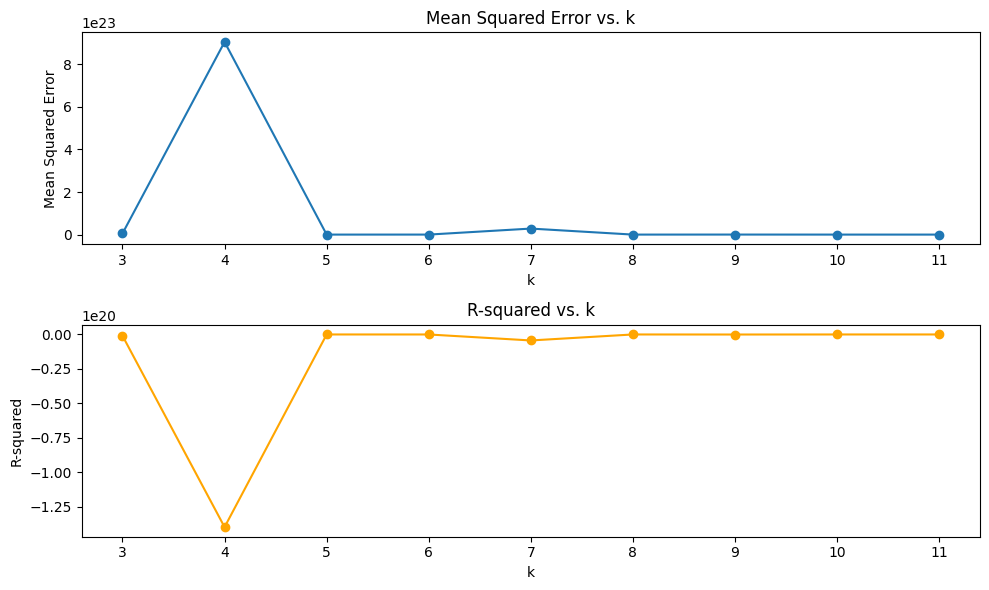

Best k based on Mean Squared Error: 11
Best k based on R-squared: 5


In [ ]:
# Find the index of the minimum MSE
best_k_index_mse = np.argmin(mse_values)
best_k_mse = k_values[best_k_index_mse]

# Find the index of the maximum R-squared
best_k_index_r_squared = np.argmax(r_squared_values)
best_k_r_squared = k_values[best_k_index_r_squared]

# Plot the results
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(k_values, mse_values, marker='o')
plt.title('Mean Squared Error vs. k')
plt.xlabel('k')
plt.ylabel('Mean Squared Error')

plt.subplot(2, 1, 2)
plt.plot(k_values, r_squared_values, marker='o', color='orange')
plt.title('R-squared vs. k')
plt.xlabel('k')
plt.ylabel('R-squared')

plt.tight_layout()
plt.show()

# Print the best k values
print(f'Best k based on Mean Squared Error: {best_k_mse}')
print(f'Best k based on R-squared: {best_k_r_squared}')


#####**Linear Regression Model after performing Regularization techniques such as L1,L2,net elastic along with Cross Validation(Hyperparameter tuning.).**

Below code will take some time to execute.

In [ ]:
# Lasso Regression
lasso_params = {'alpha': np.logspace(-4, 4, 100)}
lasso_model = Lasso()
lasso_grid = GridSearchCV(lasso_model, lasso_params, cv=5, scoring='neg_mean_squared_error')
lasso_grid.fit(X_train_scaled, y_train)
best_alpha_lasso = lasso_grid.best_params_['alpha']

lasso_model = Lasso(alpha=best_alpha_lasso)
lasso_model.fit(X_train_scaled, y_train)
y_pred_lasso = lasso_model.predict(X_test_scaled)

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r_squared_lasso = r2_score(y_test, y_pred_lasso)
print(f'\nLasso Regression:')
print(f'Best alpha: {best_alpha_lasso}')
print(f'Mean Squared Error on Test Data: {mse_lasso:.4f}')
print(f'R-squared on Test Data: {r_squared_lasso:.4f}')

# Ridge Regression
ridge_params = {'alpha': np.logspace(-4, 4, 100)}
ridge_model = Ridge()
ridge_grid = GridSearchCV(ridge_model, ridge_params, cv=5, scoring='neg_mean_squared_error')
ridge_grid.fit(X_train_scaled, y_train)
best_alpha_ridge = ridge_grid.best_params_['alpha']

ridge_model = Ridge(alpha=best_alpha_ridge)
ridge_model.fit(X_train_scaled, y_train)
y_pred_ridge = ridge_model.predict(X_test_scaled)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r_squared_ridge = r2_score(y_test, y_pred_ridge)
print(f'\nRidge Regression:')
print(f'Best alpha: {best_alpha_ridge}')
print(f'Mean Squared Error on Test Data: {mse_ridge:.4f}')
print(f'R-squared on Test Data: {r_squared_ridge:.4f}')

# Elastic Net Regression
elastic_params = {'alpha': np.logspace(-4, 4, 100), 'l1_ratio': np.linspace(0, 1, 10)}
elastic_model = ElasticNet()
elastic_grid = GridSearchCV(elastic_model, elastic_params, cv=5, scoring='neg_mean_squared_error')
elastic_grid.fit(X_train_scaled, y_train)
best_alpha_elastic = elastic_grid.best_params_['alpha']
best_l1_ratio_elastic = elastic_grid.best_params_['l1_ratio']

elastic_model = ElasticNet(alpha=best_alpha_elastic, l1_ratio=best_l1_ratio_elastic)
elastic_model.fit(X_train_scaled, y_train)
y_pred_elastic = elastic_model.predict(X_test_scaled)

mse_elastic = mean_squared_error(y_test, y_pred_elastic)
r_squared_elastic = r2_score(y_test, y_pred_elastic)
print(f'\nElastic Net Regression:')
print(f'Best alpha: {best_alpha_elastic}')
print(f'Best l1_ratio: {best_l1_ratio_elastic}')
print(f'Mean Squared Error on Test Data: {mse_elastic:.4f}')
print(f'R-squared on Test Data: {r_squared_elastic:.4f}')



Lasso Regression:
Best alpha: 0.002848035868435802
Mean Squared Error on Test Data: 1097.1684
R-squared on Test Data: 0.8304

Ridge Regression:
Best alpha: 0.43287612810830617
Mean Squared Error on Test Data: 1090.8840
R-squared on Test Data: 0.8314

Elastic Net Regression:
Best alpha: 0.000145082877849594
Best l1_ratio: 0.5555555555555556
Mean Squared Error on Test Data: 1089.9615
R-squared on Test Data: 0.8315


##### **Comparison between 'Linear Regression Model','Linear Regression Model after performing K-Fold Cross Validation' and  'Linear Regression Model after performing Regularization Techniques and K-Fold Cross Validation'**

**1. Linear Regression Model**

R-Square- 0.8302

MSE- 1098.2700

**2.  Linear regression model after performing K-Fold Cross Validation**

R-Square- 0.8057

MSE- 1515.5764

**3.  Linear Regression Model after performing Regularization Techniques and K-Fold Cross Validation**

Lasso R-Square- 0.8304

Lasso MSE- 1097.1684


Ridge R-Square- 0.8314

Ridge MSE- 1090.8840


Net Elastic R Square- 0.8315

Net Elastic MSE- 1089.9615

Now it is clear that Linear Regression Model after performing Net Elastic Regularization Techniques and K-Fold Cross Validation is giving increased R-Square value(0.8315) and least MSE(1089.9615).Hence this model will be selected for predicting unseen data.

### **Model-2:Random Forest model**

#####**Random Forest Model**

In [ ]:
# Create a Random Forest Regressor
random_forest = RandomForestRegressor(n_estimators=50, random_state=42)  # You can adjust hyperparameters like n_estimators

# Train the model on the scaled training data
random_forest.fit(X_train_scaled, y_train)

# Make predictions on the scaled testing data
y_pred = random_forest.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')



Mean Squared Error: 1040.5238255706593


**R square on Test Data.**

In [ ]:
#R-Square
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f'R2 Score: {r2}')


R2 Score: 0.8391496097997198


**Determining best value of n_estimators(Hyperparameter tuning)**

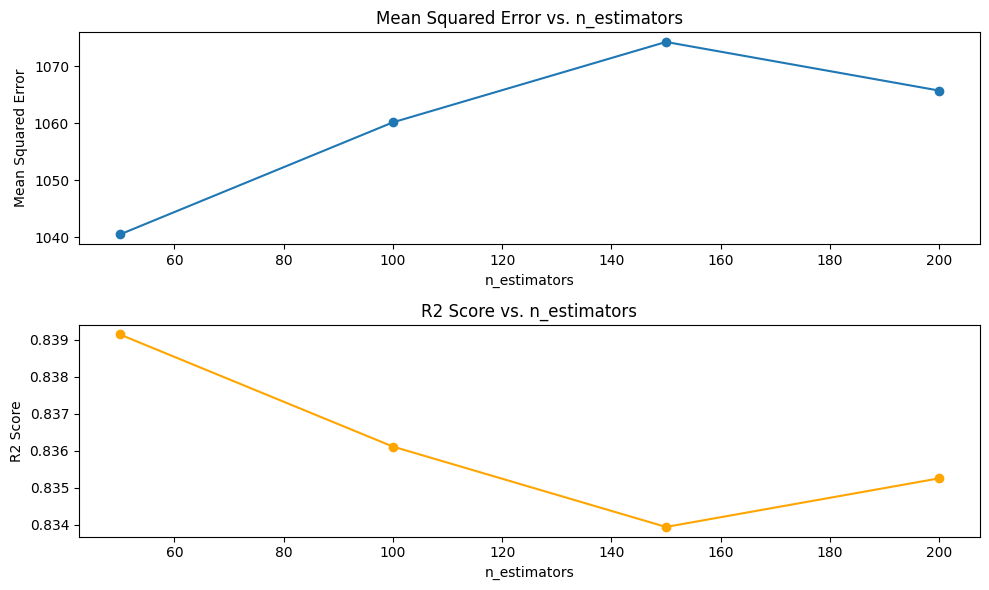

In [ ]:
# Define a list of n_estimators values to try
n_estimators_values = [50, 100, 150, 200]

# Initialize empty lists to store performance metrics
mse_values = []
r2_values = []

# Iterate over different values of n_estimators
for n_estimators in n_estimators_values:
    # Create a Random Forest Regressor with the current n_estimators value
    random_forest = RandomForestRegressor(n_estimators=n_estimators, random_state=42)

    # Train the model on the scaled training data
    random_forest.fit(X_train_scaled, y_train)

    # Make predictions on the scaled testing data
    y_pred = random_forest.predict(X_test_scaled)

    # Calculate performance metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Append metrics to the lists
    mse_values.append(mse)
    r2_values.append(r2)

# Plot the results
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(n_estimators_values, mse_values, marker='o')
plt.title('Mean Squared Error vs. n_estimators')
plt.xlabel('n_estimators')
plt.ylabel('Mean Squared Error')

plt.subplot(2, 1, 2)
plt.plot(n_estimators_values, r2_values, marker='o', color='orange')
plt.title('R2 Score vs. n_estimators')
plt.xlabel('n_estimators')
plt.ylabel('R2 Score')

plt.tight_layout()
plt.show()


##### **Random Forest Model after performing K Fold Cross Validation**

In [ ]:
# Step 8: Perform k-fold cross-validation
cv_scores = cross_val_score(random_forest, X_train_scaled, y_train, cv=7, scoring='neg_mean_squared_error')
cv_rmse_scores = np.sqrt(-cv_scores)

# Print the cross-validation scores
print("Cross-Validation RMSE Scores:", cv_rmse_scores)
print("Mean RMSE Score:", np.mean(cv_rmse_scores))

# Optionally, you can print R2 scores as well
cv_r2_scores = cross_val_score(random_forest, X_train_scaled, y_train, cv=5, scoring='r2')
print("Cross-Validation R2 Scores:", cv_r2_scores)
print("Mean R2 Score:", np.mean(cv_r2_scores))


Cross-Validation RMSE Scores: [47.77860909 34.90173939 33.57777798 61.10290144 44.05170971 35.77769496
 33.22059822]
Mean RMSE Score: 41.487290112171046
Cross-Validation R2 Scores: [0.76381434 0.75517773 0.65069136 0.72085658 0.79099892]
Mean R2 Score: 0.7363077879317844


**Determining which K- value is best(Hyperparameter tuning)**

Below code will take some time to execute.

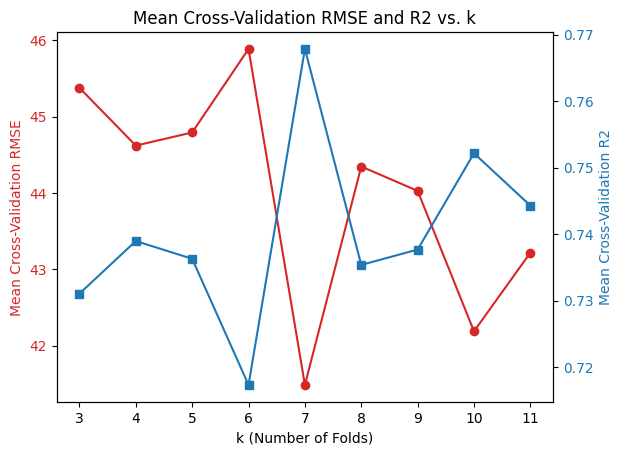

In [ ]:
# Specify the range of k values you want to test
k_values = range(3, 12)

# Store the mean cross-validation RMSE and R2 scores for each k
mean_rmse_scores = []
mean_r2_scores = []

# Iterate through each k value
for k in k_values:
    # Perform k-fold cross-validation for RMSE
    cv_scores_rmse = cross_val_score(random_forest, X_train_scaled, y_train, cv=k, scoring='neg_mean_squared_error')
    cv_rmse_scores = np.sqrt(-cv_scores_rmse)
    mean_rmse = np.mean(cv_rmse_scores)
    mean_rmse_scores.append(mean_rmse)

    # Perform k-fold cross-validation for R2
    cv_scores_r2 = cross_val_score(random_forest, X_train_scaled, y_train, cv=k, scoring='r2')
    mean_r2 = np.mean(cv_scores_r2)
    mean_r2_scores.append(mean_r2)

# Plotting the results
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('k (Number of Folds)')
ax1.set_ylabel('Mean Cross-Validation RMSE', color=color)
ax1.plot(k_values, mean_rmse_scores, marker='o', color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Mean Cross-Validation R2', color=color)
ax2.plot(k_values, mean_r2_scores, marker='s', color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Mean Cross-Validation RMSE and R2 vs. k')
plt.show()


k=7 will be used for Cross Validation beacuse R-Square is maximum at that point and MSE is minimum at that point.

##### **Comparison between Random Forest Model and Random Forest Model after performing Cross Validation**

**Random Forest Model without Performing Cross Validation**

R-Square- 0.8391

MSE- 1040.52

**Random Forest Model after performing K-fold Cross Validation**

R-Square- 0.7350

RMSE- 41.66


Now Random Forest Model without Performing Cross Validation will be chosen because R-Square is maximum and MSE is least in that model.

## Hence,**Random Forest Model without K-Fold Cross validation** will be used for prediction of data in future because as compared to the other model  it is seen that **R-Square(0.8391)** is higher in this model and **MSE(1040.52)** is lower in this model.

## **Conclusion**

In conclusion, the Housing Price Prediction project has yielded valuable insights and strategic approaches to navigating the dynamic real estate market. Emphasizing the significance of accurate price forecasting, the project underscores the importance of proactively understanding market trends, incorporating customer preferences, and introducing targeted pricing strategies. By continuously adapting to the evolving real estate landscape and providing reliable pricing predictions, this project aims to empower stakeholders in making informed decisions and ensuring a positive and fulfilling experience for those involved in property transactions.

## Submitted by- Gaurav Sardana
## Email I'd -gauravsardana00@gmail.com